In [1]:
import sys

PWD = '..'
sys.path.append(PWD)

import numpy as np
from scipy import signal
from scipy.ndimage import filters

from matplotlib import pyplot as plt

from src.plot_utils import plot_sample
from src.cfd import CFD

In [2]:
cfd = CFD()

# Load data

In [3]:
file_name = 'Ntuple_runsampic_166_runtelescope_643.npz'
all_events = np.load(f'{PWD}/data/{file_name}', allow_pickle=True)['arr_0'].flat[0]

all_events.keys()

dict_keys([11, 23, 16, 24, 29, 28, 17, 22, 12, 10])

In [4]:
events = all_events[24]

events.keys()

dict_keys(['sample_channel', 'eventIDSampic', 'sample_time', 'sample_ampl'])

# Tests

In [31]:
i_channel = 24
    
selected_events = [0, 1000, 2000, 4000, 6000, 8000, 10000, 12000]

In [41]:
def calculate_event_cfd(i_event, log=False):
    event_ampl = events['sample_ampl'][i_event]

    event_cfd_timestamps = []
    for i in range(len(event_ampl)):
        ampl = event_ampl[i]

        if log:
            print('    sample', i)
        timestamp = cfd.predict(ampl, log=log)
        event_cfd_timestamps.append(timestamp)

    return np.array(event_cfd_timestamps)

<Figure size 1440x504 with 0 Axes>

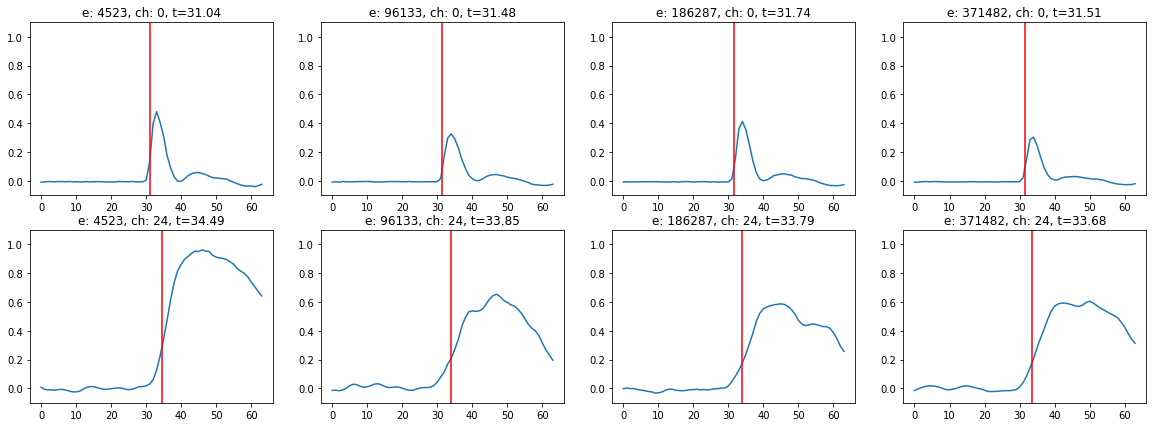

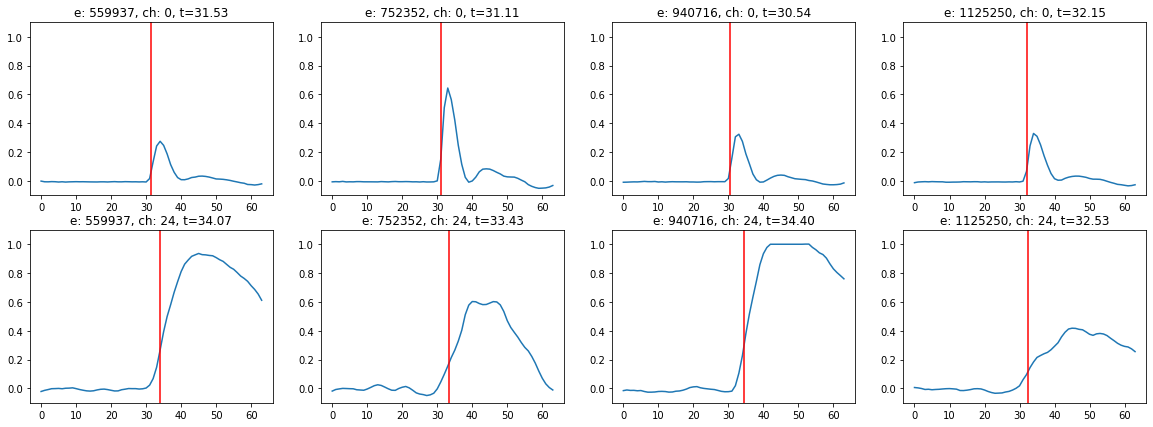

In [42]:
plt.figure(figsize=(20, 7))
for i, i_event in enumerate(selected_events):
    if i % 4 == 0:
        plt.figure(figsize=(20, 7))

    event_channels = events['sample_channel'][i_event]
    event_ampl = events['sample_ampl'][i_event]
    
    # print('event', i)
    event_cfd_timestamps = calculate_event_cfd(i_event)
    
    for j in range(2):
        plt.subplot(2, 4, j * 4 + i % 4 + 1)
        sampic_event = events['eventIDSampic'][i_event]
        plot_sample(event_ampl[j], title=f'e: {sampic_event}, ch: {event_channels[j]}', timestamp=event_cfd_timestamps[j], ylim=True)

    if i % 4 == 3:
        plt.show()
        print('=' * 170)

# Timestamp distributions

In [43]:
all_timestamps = np.zeros((len(events['sample_channel']), 2))
all_timestamps.shape

(13421, 2)

In [44]:
for i in range(len(all_timestamps)):
    all_timestamps[i] = calculate_event_cfd(i)

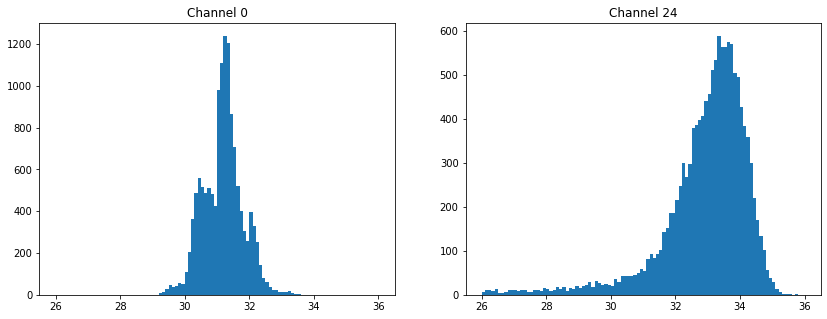

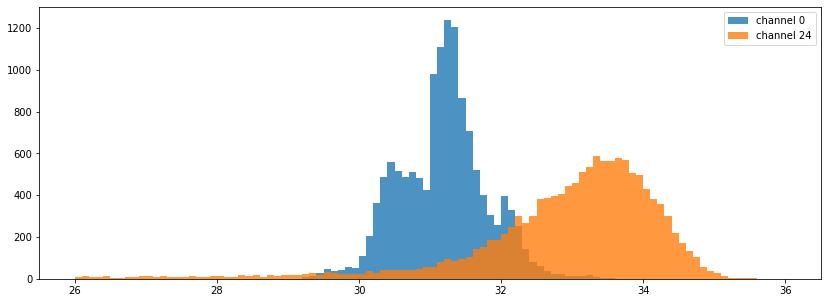

In [68]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(all_timestamps[:, 0], bins=100, range=(26, 36))
plt.title('Channel 0')

plt.subplot(1, 2, 2)
plt.hist(all_timestamps[:, 1], bins=100, range=(26, 36))
plt.title(f'Channel {i_channel}')

plt.show()

plt.figure(figsize=(14, 5))
plt.hist(all_timestamps[:, 0], bins=100, range=(26, 36), label='channel 0', alpha=0.8)
plt.hist(all_timestamps[:, 1], bins=100, range=(26, 36), label=f'channel {i_channel}', alpha=0.8)
plt.legend()
plt.show()